import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

load dataset

In [4]:
df = pd.read_csv('data.csv')

preview dataset

In [5]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


dataset info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


check if there's any missing values

In [7]:
df.isna().sum()

Height    0
Weight    0
dtype: int64

# Clean Data

data is clean

# Exploratory Data Analysis

In [8]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


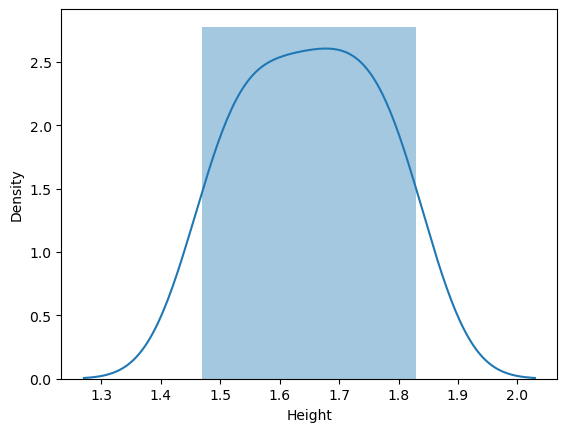

In [9]:
sns.distplot(df['Height']);

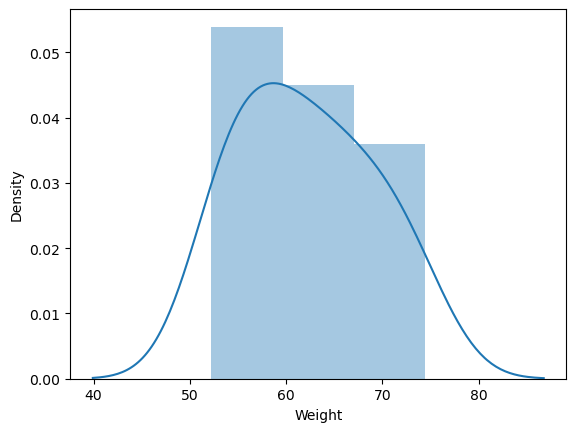

In [10]:
sns.distplot(df['Weight']);

# Preprocessing modeling

In [11]:
X = df.drop(['Weight'],axis=1)
y = df['Weight']

splitting training and test set

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 1/3, random_state = 42)

# simple linear regression

fitting into training

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
regressor.coef_

array([61.43142145])

predict the result

In [16]:
y_pred = regressor.predict(X_test)

plot the result

In [18]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})

In [19]:
result

,Actual,Predict
9,64.47,64.617805
11,68.10,67.689377
0,52.21,50.488579
13,72.19,70.760948
5,58.57,58.474663
8,63.11,63.389177
2,54.48,53.560150
1,53.12,52.331521
14,74.46,72.603890
4,57.20,56.631721


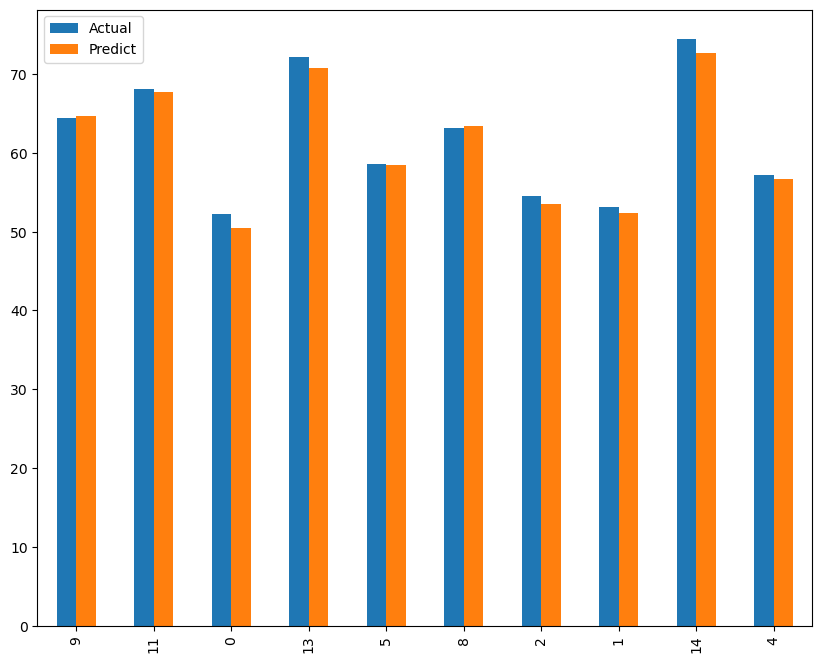

In [20]:
result.plot(kind = 'bar', figsize = (10,8))
plt.show()

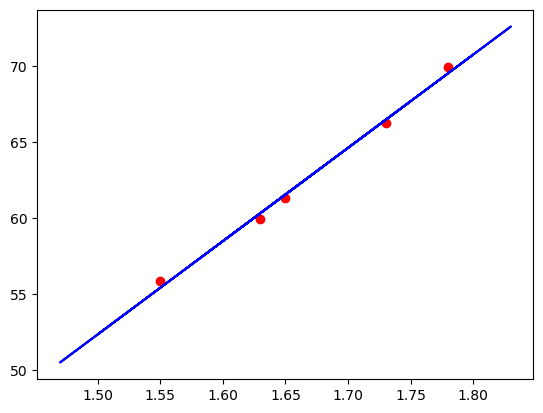

In [21]:
plt.scatter(X_train, y_train, color='red') 

plt.plot(X_test.values, y_pred, color='blue') 

plt.show()

# Evaluate Model

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.0256157985244876

In [23]:
mean_absolute_error(y_test, y_pred)

0.8216134663341534

In [24]:
mean_absolute_percentage_error(y_test, y_pred)

0.013373064754111475

In [25]:
r2_score(y_test, y_pred)

0.9815214398817671